In [3]:
!pip install matplotlib

In [5]:
import matplotlib.pyplot as plt
#from generate import generate_maze ругается на него
import random as rd

In [6]:
from dataclasses import dataclass, field

@dataclass
class MazeCell:
    x: int
    y: int
    component: int
    is_open: bool = field(default=False)
    walls: list = field(default_factory=list)

In [7]:
N = 30
LINE_WIDTH = 50

In [8]:
"""
В этой ячейке должен быть код генератора лабиринта
"""

# проверяет компоненты связности у всех ячеек лабиринта
def check_comp(maze):
    component = maze[0].component
    for i in range(N*N):
        if component != maze[i].component:
            return True


# проверяет, лежат ли два элемента в одном множестве
def find(x, y):
    return x.component == y.component

# находит все элементы множества
def find_set(x, maze):
    cells = []
    for cell in maze:
        if cell.component == x:
            cells.append(cell)

    return cells


def union(x, y, maze):
    if not find(x, y):
        for cell in find_set(y.component, maze):
            cell.component = x.component
        return True
    return False


def get_neigbours(x, y, maze):
    neighbours = []
    for cell in maze:
        if (x-1 == cell.x and y == cell.y) or (x+1 == cell.x and y == cell.y) or (y-1 == cell.y and x == cell.x) or (y+1 == cell.y and x == cell.x):
            neighbours.append(cell)

    return neighbours


def delete_walls(cell, neighbour):
    x, y = neighbour.x - cell.x, neighbour.y - cell.y

    if x > 0:
        cell.walls[1] = False
        neighbour.walls[3] = False
    elif x < 0:
        cell.walls[3] = False
        neighbour.walls[1] = False

    if y > 0:
        cell.walls[2] = False
        neighbour.walls[0] = False
    elif y < 0:
        cell.walls[0] = False
        neighbour.walls[2] = False


def rand_choise(unchoises, maze):
    return rd.choice(maze)



def generate_maze(N) -> list[list[MazeCell]]:
    maze = []
    n = 0
    for y in range(N):
        line = []
        for x in range(N):
            maze.append(MazeCell(x, y, n, False, [True, True, True, True]))
            n += 1

    unchoises = maze[:]


    while check_comp(maze):
        cell = rand_choise(unchoises, maze)
        if cell is None: break
        x, y = cell.x, cell.y
        neighbours = get_neigbours(x, y, maze)
        neighbour = rd.choice(neighbours)

        if union(cell, neighbour, maze):
            delete_walls(cell, neighbour)

    maze[0].is_open = True
    maze[0].walls[0] = False
    maze[-1].is_open = True
    maze[-1].walls[2] = False

    return maze

In [9]:
maze = generate_maze(N)

In [10]:
def draw_maze(maze):

    for cell in maze:
        if cell.walls[0]:
            start_x, end_x = cell.x, cell.x+1
            start_y, end_y = N - cell.y, N - cell.y
            plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

        if cell.walls[1]:
            start_x, end_x = cell.x+1, cell.x+1
            start_y, end_y = N - cell.y, N - cell.y-1
            plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

        if cell.walls[2]:
            start_x, end_x = cell.x, cell.x+1
            start_y, end_y = N - cell.y-1, N - cell.y-1
            plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

        if cell.walls[3]:
            start_x, end_x = cell.x, cell.x
            start_y, end_y = N - cell.y, N - cell.y-1
            plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

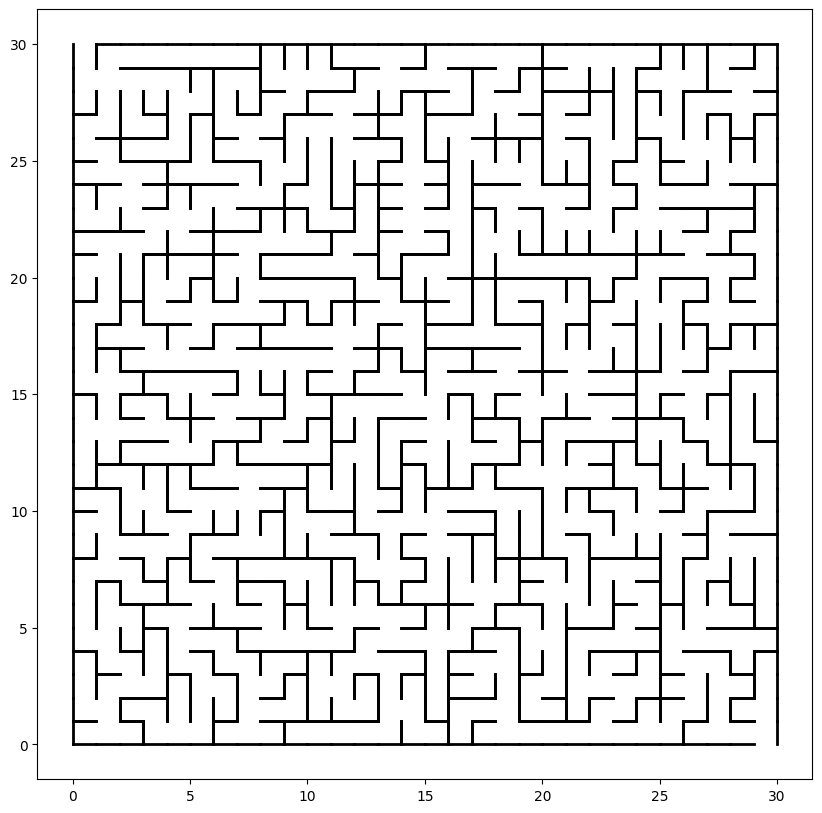

In [14]:
fig = plt.figure(figsize=(10, 10))

draw_maze(maze)

plt.show()